<a href="https://colab.research.google.com/github/vasishtaa08/KNN-and-XG-BOOST/blob/main/XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error (MSE): 49.08889165404448
Root Mean Squared Error (RMSE): 7.006346526831547
R-squared: 0.8523844092225658
         Actual  Predicted
0     16.860000  16.627045
1     24.720000  23.500521
2     11.862167  11.603390
3     11.862167   0.169937
4     27.060000  27.601358
...         ...        ...
2136  19.390000  19.039648
2137  -0.090000   0.169937
2138  -0.190000   0.169937
2139  47.840000  48.511482
2140   0.010000   0.169937

[2141 rows x 2 columns]


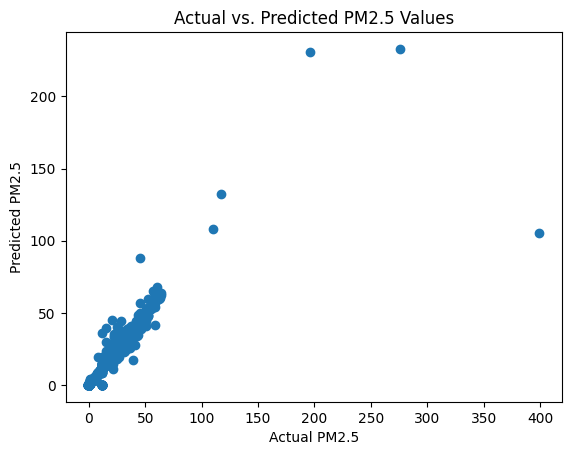

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/BTM_hourly.csv"

df = pd.read_csv(file_path)
numeric_cols = df.columns[df.dtypes == 'object']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


df.replace('None', pd.NA, inplace=True)
X = df.drop('PM2.5', axis=1)  # Features
y = df['PM2.5']  # Target variable
imputer = SimpleImputer(strategy='mean')
imputer_y = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y = y.values.reshape(-1, 1)
y_imputed = imputer_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
from sklearn.metrics import r2_score
# Assuming 'y_test' and 'y_pred' are your true and predicted values
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

# Print the DataFrame
print(comparison_df)

# Plot a scatter plot to visualize the comparison
plt.scatter(y_test, y_pred)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5 Values')
plt.show()